# **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **LOAD DATA**

In [2]:
df = pd.read_csv('/content/SALES(2025-01--2025-12)Detailed.csv')
df.head()

/tmp/ipython-input-3121155870.py:1: DtypeWarning: Columns (3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/SALES(2025-01--2025-12)Detailed.csv')


,DistributorCode,DistributorName,SaleFlag,InvoiceNo,ClientCode,ClientName,ClientType,BrickCode,BrickName,TeamCode,...,PackCode,ProductName,Description,StockBatch,InvoiceDate,Units,Bonus,Discount,TPrice,ValueNp
0,2714,PREMIER SALES PVT LTD-JHELUM,S,480639,3667,SUPER DRUGS PHARMACY/CHAUDAHARY MANZIL GROUND ...,Retailer,1009312,OUTSTATION-DINA-MANGLA ROAD DINA,19,...,4442620,Orslim,Cap. 120mg 30's,5H164,"Thursday, November 13, 2025",2,0,0.0,2188.75,4377.50
1,2714,PREMIER SALES PVT LTD-JHELUM,S,436402,149,AL SHIFA MEDICAL STORE/D.H.Q HOSPITAL.JHELUM/,Retailer,1009273,JEHLUM-JADA-DHQ HOSPITAL,6,...,PV13247,Erlina,Tab. 10/5mg 14's,5D265,"Wednesday, July 16, 2025",1,0,0.0,487.90,487.90
2,2714,PREMIER SALES PVT LTD-JHELUM,S,436433,3466,NH PHARMACY/MUHAMMADI CHOWK JHELUM/,Retailer,1009277,JEHLUM-CIVIL LINE ROAD-MUHAMMADI CHOWK,6,...,PV13248,Erlina,Tab. 25/5mg 14's,5D267,"Wednesday, July 16, 2025",1,0,0.0,690.20,690.20
3,486,PREMIER SALES PVT LTD-D.I.KHAN,S,337378,2142,SARDAR MEDICAL STORE/JINAH-II/,Retailer,1010345,DI KHAN-DHQ HOSPITAL-JINNAH COMPLEX HOSPITAL R...,22,...,PV11601,Femova,Sac. 10's,N5K036,"Thursday, November 20, 2025",1,0,0.0,1080.51,1080.51
4,2714,PREMIER SALES PVT LTD-JHELUM,S,436728,1623,"PUNJAB MEDICAL STORE/RAILWAY ROAD, P.D KHAN/",Retailer,1009368,OUTSTATION-P.D KHAN-MAIN BAZAR P.D KHAN,2,...,PV04807,Inosita,Tab. 50mg 28's,5B161,"Wednesday, July 16, 2025",1,0,0.0,999.60,999.60


# **BASIC UNDERSTANDING OF DATA**

In [4]:
df.shape

(258936, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258936 entries, 0 to 258935
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DistributorCode  258936 non-null  int64         
 1   DistributorName  258936 non-null  object        
 2   SaleFlag         258936 non-null  object        
 3   InvoiceNo        258936 non-null  object        
 4   ClientCode       258936 non-null  object        
 5   ClientName       258936 non-null  object        
 6   ClientType       258652 non-null  object        
 7   BrickCode        258932 non-null  object        
 8   BrickName        258936 non-null  object        
 9   TeamCode         258936 non-null  int64         
 10  TeamName         258936 non-null  object        
 11  PackCode         258936 non-null  object        
 12  ProductName      258936 non-null  object        
 13  Description      258936 non-null  object        
 14  StockBatch       258

In [7]:
df.describe()

,DistributorCode,TeamCode,Units,Bonus,Discount,TPrice,ValueNp
count,258936.000000,258936.000000,258936.000000,258936.000000,258936.000000,258936.000000,2.589360e+05
mean,3351.245957,13.303079,4.613074,0.019684,36.632432,507.424768,1.776444e+03
std,1930.381409,9.806379,121.355491,0.918996,1863.093542,454.195323,1.059222e+04
min,71.000000,2.000000,1.000000,0.000000,0.000000,22.390000,5.264900e+01
25%,2695.000000,5.000000,1.000000,0.000000,0.000000,269.240000,4.879000e+02
50%,2723.000000,9.000000,2.000000,0.000000,0.000000,416.500000,7.854000e+02
75%,2903.000000,25.000000,3.000000,0.000000,0.000000,569.500000,1.443300e+03
max,8347.000000,35.000000,50000.000000,280.000000,671186.500000,45762.710000,1.664875e+06


# **CONVERSION OF DATA TYPE**

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.rename(columns={'InvoiceDate': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


In [23]:
monthly_sales = df.groupby(df['Date'].dt.month)['Sales'].sum()


KeyError: 'Column not found: Sales'

# **VISUALIZATION**

# **MONTHLY SALES TREND**

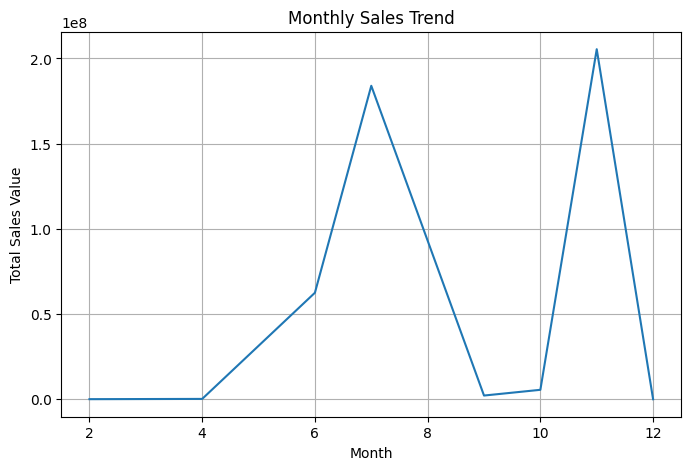

In [24]:
monthly_sales = df.groupby(df['Date'].dt.month)['ValueNp'].sum()

plt.figure(figsize=(8,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid()
plt.show()


# **SALES BY TEAM**

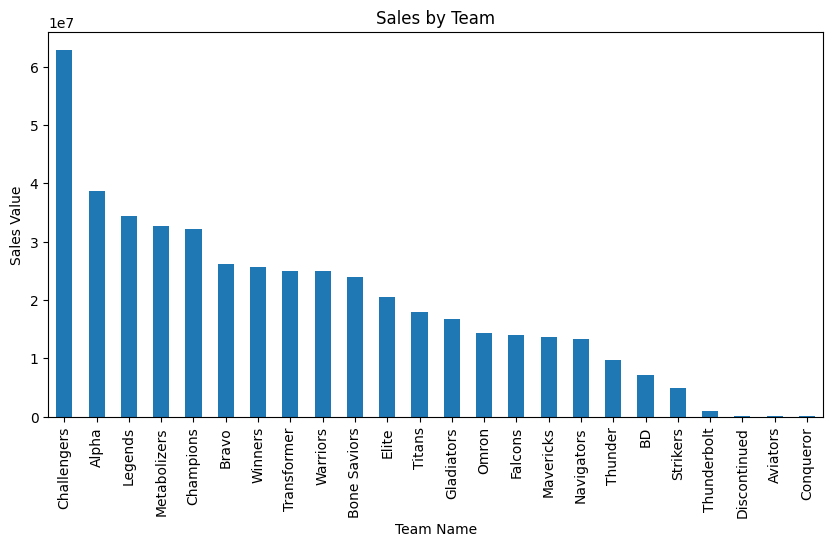

In [25]:
team_sales = df.groupby('TeamName')['ValueNp'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
team_sales.plot(kind='bar')
plt.title('Sales by Team')
plt.xlabel('Team Name')
plt.ylabel('Sales Value')
plt.show()


# **TOP 10 PRODUCTS BY SALES VALUE**

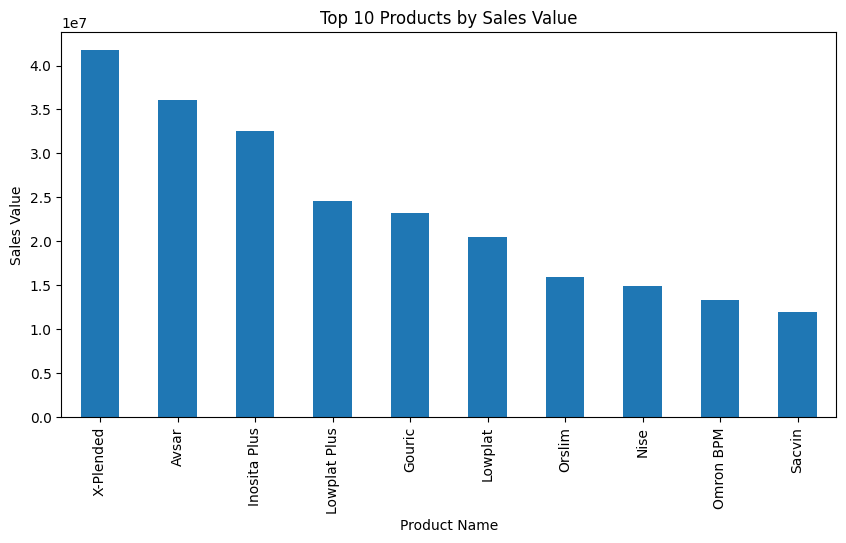

In [26]:
top_products = (
    df.groupby('ProductName')['ValueNp']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales Value')
plt.xlabel('Product Name')
plt.ylabel('Sales Value')
plt.show()


# **UNITS SOLD BY PRODUCT (VOLUME ANALYSIS)**

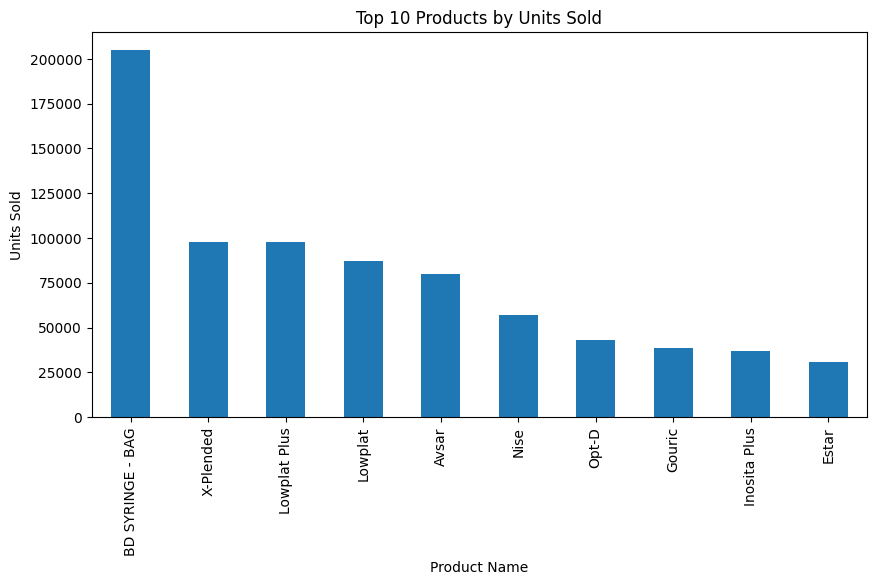

In [27]:
top_units = (
    df.groupby('ProductName')['Units']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_units.plot(kind='bar')
plt.title('Top 10 Products by Units Sold')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.show()


# **DISCOUNT VS SALES VALUE**

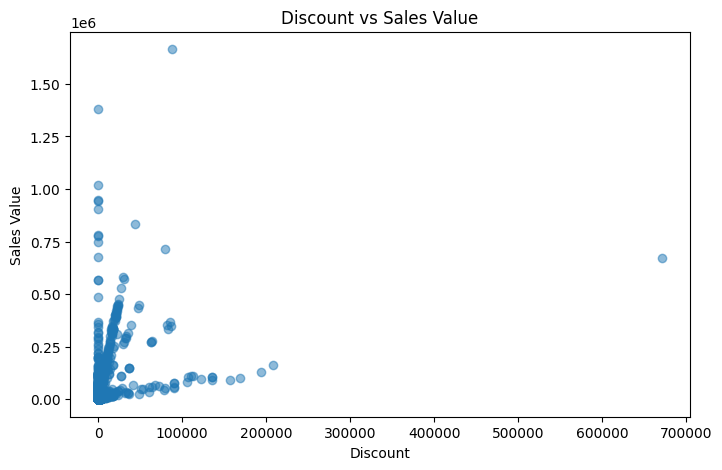

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(df['Discount'], df['ValueNp'], alpha=0.5)
plt.title('Discount vs Sales Value')
plt.xlabel('Discount')
plt.ylabel('Sales Value')
plt.show()


# **CORRELATION HEATMAP (DATA SCIENCE BRIDGE)**

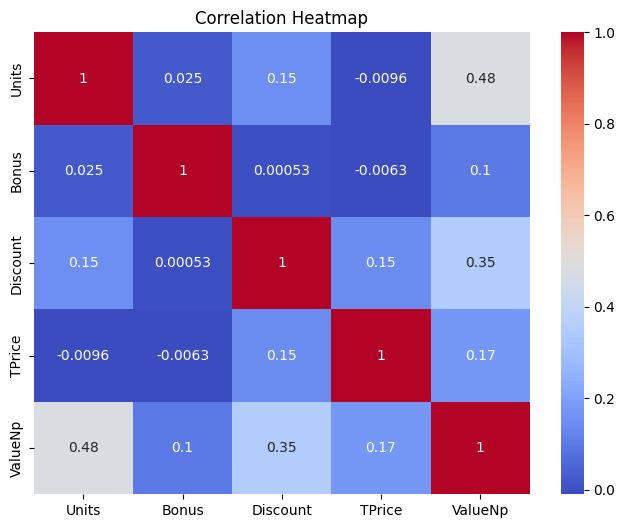

In [29]:
numeric_cols = ['Units', 'Bonus', 'Discount', 'TPrice', 'ValueNp']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **SALES BY DISTRIBUTOR (TOP 10)**

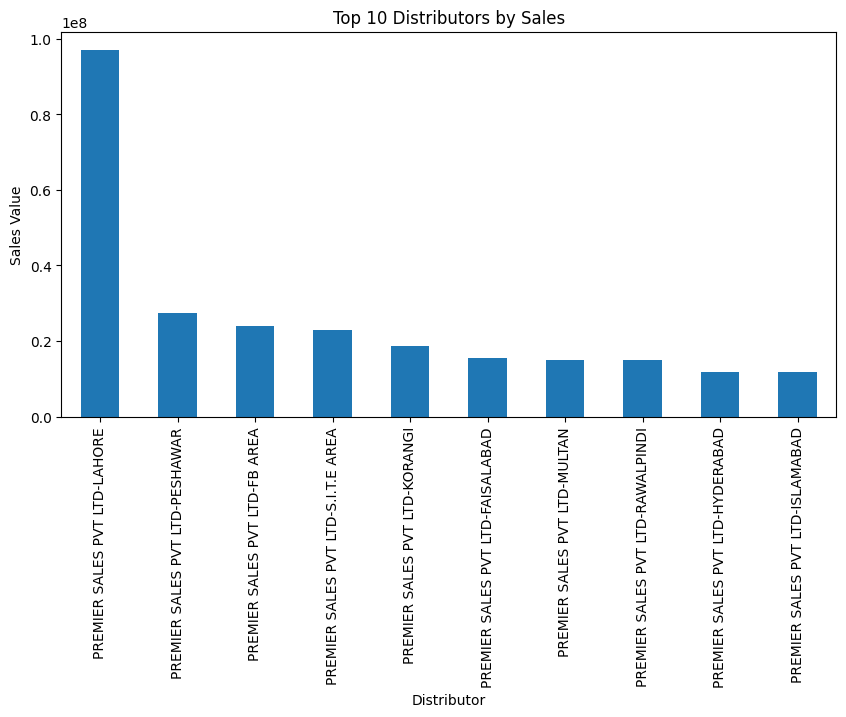

In [30]:
top_distributors = (
    df.groupby('DistributorName')['ValueNp']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_distributors.plot(kind='bar')
plt.title('Top 10 Distributors by Sales')
plt.xlabel('Distributor')
plt.ylabel('Sales Value')
plt.show()
